In [14]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
%matplotlib inline
from pandas_profiling import ProfileReport
import pandas.util.testing as tm

In [16]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/videogamesales/vgsales.csv
/kaggle/input/videogamescompaniesregions/indie-games-developers.csv
/kaggle/input/videogamescompaniesregions/video-games-developers.csv


In [17]:
data_file_path = "/kaggle/input/videogamesales/vgsales.csv"
companie_region_path = "/kaggle/input/videogamescompaniesregions/video-games-developers.csv"
total_sales_column = "Total_Sales"

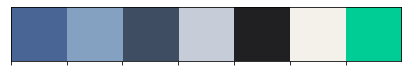

In [18]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]

plt.rcParams['axes.facecolor'] = primary_bgcolor

colors = [primary_blue, primary_blue2, primary_blue3, primary_grey, primary_black, primary_bgcolor, primary_green]
sns.palplot(sns.color_palette(colors))

In [19]:
# Load core data
data_df = pd.read_csv(data_file_path)
data_df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [20]:
# Load companie-region data
region_df = pd.read_csv(companie_region_path)
region_df.head()

Developer    City Administrative division         Country  Est.  \
0        0verflow   Tokyo                     NaN           Japan  1997   
1  11 bit studios  Warsaw    Masovian Voivodeship          Poland  2010   
2      1C Company  Moscow                     NaN          Russia  1991   
3     1-Up Studio   Tokyo                     NaN           Japan  2000   
4        2K Czech    Brno                     NaN  Czech Republic  1997   

    Notable games, series or franchises  \
0      School DaysSummer DaysCross Days   
1                             Frostpunk   
2  King's Bounty: Warriors of the North   
3                              Mother 3   
4                         MafiaMafia II   

                                               Notes  
0  Visual Novel brand (both developer and publisher)  
1                          Indie developer/publisher  
2  Game localization. The game development subsid...  
3  Subsidiary of Nintendo. Formed by former emplo...  
4  Former subsidiary of 2K Games; previously know...

In [21]:
df = pd.merge(data_df, region_df[['Developer', 'Country']], left_on='Publisher', right_on='Developer', how='left')
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales Developer Country  
0     41.49     29.02      3.77         8.46         82.74  Nintendo   Japan  
1     29.08      3.58      6.81         0.77         40.24  Nintendo   Japan  
2     15.85     12.88      3.79         3.31         35.82  Nintendo   Japan  
3     15.75     11.01      3.28         2.96         33.00  Nintendo   Japan  
4     11.27      8.89     10.22         1.00         31.37  Nintendo   Japan

In [22]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Developer',
       'Country'],
      dtype='object')

In [23]:
vgames_profile = ProfileReport(df, title='Video Games Profile Report')

In [24]:
vgames_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]